# Tensorflow and Keras

## Modeling

Let's review some modeling concepts we've used to date with [this quick exercise](https://forms.gle/yrPxUp2Xj4R9FeyEA)


We do this to remind ourselves that the basic components of good modeling practice, and even the methods themselves, are _the same_ with Neural Nets as that are with _sklearn_ or _statsmodels_.

The above exercise uses only one train-test split, but is still usefule.  We will be using train, validation, test in this notebook, for good practice.

## Objectives:
- Compare pros and cons of Keras vs TensorFlow
- hands on practice coding a neural network

In [160]:
import keras

Wait a second, what is that warning? 
`Using TensorFlow backend.`

<img align =left src="img/keras.png"><br>
### Keras is an API

Coded in Python, that can be layered on top of many different back-end processing systems.

![kerasback](img/keras_tf_theano.png)

While each of these systems has their own coding methods, Keras abstracts from that in streamlined pythonic manner we are used to seeing in other python modeling libraries.

Keras development is backed primarily by Google, and the Keras API comes packaged in TensorFlow as tf.keras. Additionally, Microsoft maintains the CNTK Keras backend. Amazon AWS is maintaining the Keras fork with MXNet support. Other contributing companies include NVIDIA, Uber, and Apple (with CoreML).

## Wait, what's TensorFlow?


## Let's start with tensors

## Tensors are multidimensional matricies

![tensor](img/tensors.png)

### TensorFlow manages the flow of matrix math

That makes neural network processing possible.

![cat](img/cat-tensors.gif)

For our numbers dataset, our tensors from the sklearn dataset were originally tensors of the shape 8x8, i.e.64 pictures.  Remember, that was with black and white images.

For image processing, we are often dealing with color.

In [161]:
from sklearn.datasets import load_sample_images
image = load_sample_images()['images'][0]

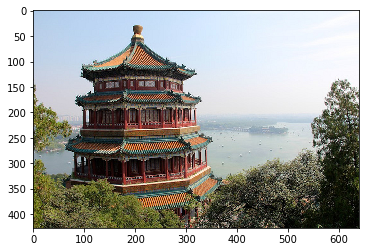

In [162]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(image)

In [163]:
image.shape

(427, 640, 3)

What do the dimensions of our image above represent?

In [164]:
import numpy as np
from matplotlib import pyplot as plt

mccalister = ['Adam', 'Amanda','Chum', 'Dann',
 'Jacob', 'Jason', 'Johnhoy', 'Karim',
'Leana','Luluva', 'Matt', 'Maximilian','Syd' ]

# This is always a good idea
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.student_caller import one_random_student

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [165]:
one_random_student(mccalister)

Karim


Even with tensors of higher **rank**

A matrix with rows and columns only, like the black and white numbers, are **rank 2**.

A matrix with a third dimension, like the color pictures above, are **rank 3**.

When we flatten an image by stacking the rows in a column, we are decreasing the rank. 

In [166]:
flat_image = image.reshape(-1,1)

When we unrow a column, we increase its rank.

In [167]:
unrowed = flat_image.reshape(427,640, -1)

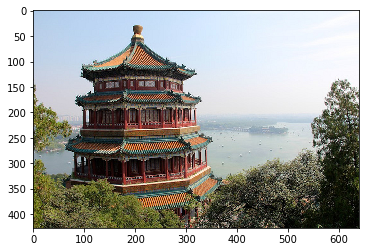

In [168]:
imgplot = plt.imshow(unrowed)

### Wait, what tool am I even using, what's Keras?
## More levers and buttons

Coding directly in **Tensorflow** allows you to tweak more parameters to optimize performance. The **Keras** wrapper makes the code more accessible for developers prototyping models.

![levers](img/levers.jpeg)

### Keras, an API with an intentional UX

- Deliberately design end-to-end user workflows
- Reduce cognitive load for your users
- Provide helpful feedback to your users

[full article here](https://blog.keras.io/user-experience-design-for-apis.html)<br>
[full list of why to use Keras](https://keras.io/why-use-keras/)

### A few comparisons

While you **can leverage both**, here are a few comparisons.

| Comparison | Keras | Tensorflow|
|------------|-------|-----------|
| **Level of API** | high-level API | High and low-level APIs |
| **Speed** |  can *seem* slower |  is a bit faster |
| **Language architecture** | simple architecture, more readable and concise | straight tensorflow is a bit mroe complex |
| **Debugging** | less frequent need to debug | difficult to debug |
| **Datasets** | usually used for small datasets | high performance models and large datasets that require fast execution|

This is also a _**non-issue**_ - as you can leverage tensorflow commands within keras and vice versa. If Keras ever seems slower, it's because the developer's time is more expensive than the GPUs. Keras is designed with the developer in mind. 


[reference link](https://www.edureka.co/blog/keras-vs-tensorflow-vs-pytorch/)

### Think, Pair, Share Challenge:

<img src="https://images.pexels.com/photos/1350560/pexels-photo-1350560.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" alt="diabetes" style ="text-align:center;width:250px;float:none" ></br>

Let's begin implementing our neural net with the UCI digit dataset we imported from sklearn yesterday.

Let's continue where we left off with our numbers dataset.

In [169]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X = digits.data
y = digits.target


We will start with a binary classification, and predict whether the number will be even or odd.

In [170]:
y_binary = y % 2
y_binary

array([0, 1, 0, ..., 0, 1, 0])

In pairs, proceed through the following three parts. 

#### Part 1:
Questions to answer:
- How many input variables are there in this dataset? 
- What does the range of values (0-16) represent in our feature set?
- What does a 1 mean in our target class?
- If we use a neural net to predict this, what loss function do we use?
***

***
#### Part 2:
What if you wanted to create a NN with hidden layers to predict even numbers with:
- 12 nodes in the first hidden layer
- 8 nodes in the second hidden layer
- relu on the first two activations
- sigmoid on the last one

Answer the following questions:
- How many nodes in the input layer?
- How many nodes in the output layer?
- Will the output layer produce an integer or a float?
***

***

#### Part 3:
Knowing that you want:
- batch size of 10
- 50 epochs
- to use `rmsprop` as your optimizer
- and all the numbers you defined above...

**Fill out the code below with the correct specifications, but don't run it yet**

In [171]:
model = Sequential()
model.add(Dense(   , activation= , input_dim= ))
model.add(Dense( ,  activation= ))
model.add(Dense(  , activation =  ))

model.compile(optimizer= ,
              loss=,
              metrics=['accuracy'])
model.fit(data, labels, epochs=, batch_size=  )

SyntaxError: invalid syntax (<ipython-input-171-990b674031ad>, line 2)

### Things to know:
- the data and labels in `fit()` need to be numpy arrays, not pandas dfs. Else it won't work.
- Scaling your data will have a large impact on your model.   
  > For our traditional input features, we would use a scalar object.  For images, as long as the minimum value is 0, we can simply divide through by the maximum pixel intensity.

![gif](https://media0.giphy.com/media/3og0IMJcSI8p6hYQXS/giphy.gif)

#### Getting data ready for modeling
**Tasks**:

- use train_test_split to create X_train, y_train, X_test, and y_test
- Split training data into train and validation sets.
- Scale the pixel intensity to a value between 0 and 1.
- Scale the pixel intensity to a value between 0 and 1.

Scaling data for neural networks is very important, whether it be for image processing or prediction problems like we've seen in past projects and lessons.  

Scaling our input variables will help speed up our neural network [see 4.3](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)

Since our minimum intensity is 0, we can normalize the inputs by dividing each value by the max value (16). 

In [173]:
# Your code here

Now that our data is ready, let's load in keras

In [175]:
from keras.models import Sequential

In [176]:
from keras.layers import Dense

Let's start working through the different choices we can make in our network.

For activation, let's start with the familiar sigmoid function, and see how it performs.

In [177]:
np.random.seed(42)
model = Sequential()
model.add(Dense(12, activation='sigmoid', input_dim=64,))
model.add(Dense(8 ,  activation='sigmoid' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD' ,
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])

# Assign the variable history to store the results, and set verbose=1 so we can see the output.
results = model.fit(X_t, y_t, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
1149/1149 [==============================] - 2s 2ms/step - loss: 0.7928 - acc: 0.5039
Epoch 2/10
1149/1149 [==============================] - 0s 20us/step - loss: 0.7743 - acc: 0.5039
Epoch 3/10
1149/1149 [==============================] - 0s 19us/step - loss: 0.7593 - acc: 0.5039
Epoch 4/10
1149/1149 [==============================] - 0s 19us/step - loss: 0.7465 - acc: 0.5039
Epoch 5/10
1149/1149 [==============================] - 0s 22us/step - loss: 0.7360 - acc: 0.5039
Epoch 6/10
1149/1149 [==============================] - 0s 23us/step - loss: 0.7273 - acc: 0.5039
Epoch 7/10
1149/1149 [==============================] - 0s 22us/step - loss: 0.7200 - acc: 0.5039
Epoch 8/10
1149/1149 [==============================] - 0s 23us/step - loss: 0.7143 - acc: 0.5039
Epoch 9/10
1149/1149 [==============================] - 0s 23us/step - loss: 0.7094 - acc: 0.5039
Epoch 10/10
1149/1149 [==============================] - 0s 23us/step - loss: 0.7057 - acc: 0.5039


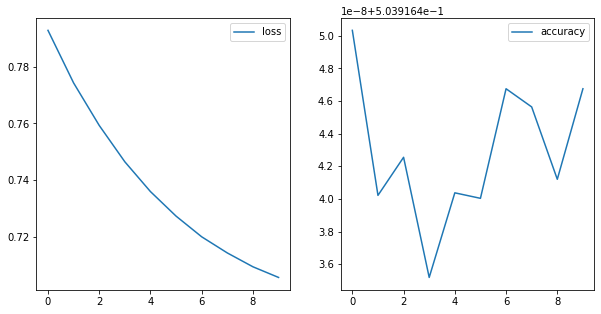

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sigmoid_loss = results.history['loss']
sigmoid_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, results.history['loss'], ax=ax1, label='loss')
sns.lineplot(results.epoch, results.history['acc'], ax=ax2, label='accuracy')

If we look at our loss, it is still decreasing. That is a signal that our model is still learning. If our model is still learning, we can allow it to get better by increasing the number of epochs.

In [179]:
model = Sequential()
model.add(Dense(12, activation='sigmoid', input_dim=64,))
model.add(Dense(8 ,  activation='sigmoid' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD' ,
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])

# Assign the variable history to store the results, and set verbose=1 so we can see the output.
results = model.fit(X_t, y_t, epochs=50, batch_size=23, verbose=1)

Epoch 1/50
1149/1149 [==============================] - 2s 2ms/step - loss: 0.7128 - acc: 0.4961
Epoch 2/50
1149/1149 [==============================] - 0s 79us/step - loss: 0.6964 - acc: 0.4961
Epoch 3/50
1149/1149 [==============================] - 0s 74us/step - loss: 0.6890 - acc: 0.4961
Epoch 4/50
1149/1149 [==============================] - 0s 75us/step - loss: 0.6852 - acc: 0.4961
Epoch 5/50
1149/1149 [==============================] - 0s 74us/step - loss: 0.6831 - acc: 0.5231
Epoch 6/50
1149/1149 [==============================] - 0s 75us/step - loss: 0.6818 - acc: 0.6762
Epoch 7/50
1149/1149 [==============================] - 0s 81us/step - loss: 0.6808 - acc: 0.7076
Epoch 8/50
1149/1149 [==============================] - 0s 78us/step - loss: 0.6800 - acc: 0.7389
Epoch 9/50
1149/1149 [==============================] - 0s 106us/step - loss: 0.6791 - acc: 0.7546
Epoch 10/50
1149/1149 [==============================] - 0s 90us/step - loss: 0.6783 - acc: 0.7720
Epoch 11/50
1149/11

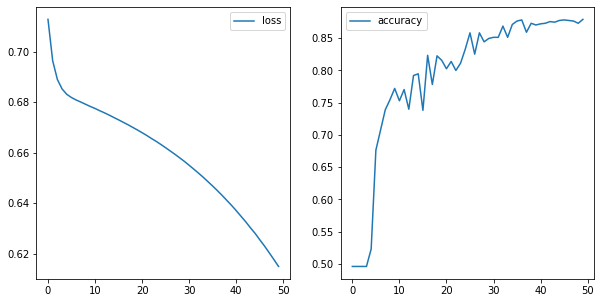

In [180]:
sigmoid_loss = results.history['loss']
sigmoid_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, sigmoid_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, sigmoid_accuracy, ax=ax2, label='accuracy')

It still looks like our model has not converged.  The loss is still decreasing, and the accuracy is still increasing.  We could continue increasing the epochs, but that will be time consuming.  

We could try decreasing the batch size. Let's set the batch size to 1.  This is true stochastic gradient descent.  The parameters are updated after each sample is passed into the model.

SGD with a small batch size takes longer to run through an epoch, but will take less epochs to improve.

In [115]:
model = Sequential()
model.add(Dense(12, activation='sigmoid', input_dim=64,))
model.add(Dense(8 ,  activation='sigmoid' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD' ,
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])

# Assign the variable history to store the results, and set verbose=1 so we can see the output.
results = model.fit(X_t, y_t, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
1149/1149 [==============================] - 3s 2ms/step - loss: 0.6983 - acc: 0.5091
Epoch 2/10
1149/1149 [==============================] - 1s 1ms/step - loss: 0.6957 - acc: 0.4891
Epoch 3/10
1149/1149 [==============================] - 1s 1ms/step - loss: 0.6920 - acc: 0.5100
Epoch 4/10
1149/1149 [==============================] - 1s 1ms/step - loss: 0.6854 - acc: 0.5579
Epoch 5/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.6763 - acc: 0.6197
Epoch 6/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.6572 - acc: 0.7076
Epoch 7/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.6162 - acc: 0.7920
Epoch 8/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.5365 - acc: 0.8251
Epoch 9/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.4357 - acc: 0.8503
Epoch 10/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.3608 - acc: 0.8686


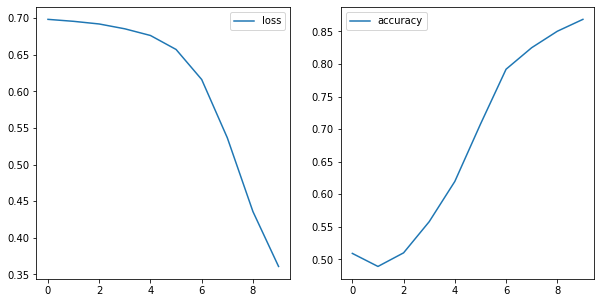

In [116]:
sigmoid_one_loss = results.history['loss']
sigmoid_one_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, sigmoid_one_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, sigmoid_one_accuracy, ax=ax2, label='accuracy')

Comparing our 50 epoch version with a 500 batch size and a 10 epoch version with a 1 example batch size, we see that by 10 epochs, the latter has achieved 90% accuracy by the final epoch, while our 23 batch size is just about 70%.  However, with the 1 example batch, each epoch took a lot longer.

Still, even though the 2nd model reached a higher accuracy and lower loss, it looks like it still has not stopped learning. The slope of the loss is getting smaller, but it has not leveled out completely.

In [182]:
from keras.optimizers import SGD

model = Sequential()

sgd = SGD(lr=.02)
model.add(Dense(12, activation='sigmoid', input_dim=64,))
model.add(Dense(8 ,  activation='sigmoid' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer=sgd ,
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])

# Assign the variable history to store the results, and set verbose=1 so we can see the output.
results = model.fit(X_t, y_t, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
1149/1149 [==============================] - 4s 3ms/step - loss: 0.6922 - acc: 0.5370
Epoch 2/10
1149/1149 [==============================] - 2s 2ms/step - loss: 0.6586 - acc: 0.6501
Epoch 3/10
1149/1149 [==============================] - 2s 2ms/step - loss: 0.5514 - acc: 0.7868A: 0s - loss: 0.5544 - acc: 0.7
Epoch 4/10
1149/1149 [==============================] - 2s 2ms/step - loss: 0.3887 - acc: 0.8590
Epoch 5/10
1149/1149 [==============================] - 2s 2ms/step - loss: 0.3094 - acc: 0.8790
Epoch 6/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.2706 - acc: 0.8930
Epoch 7/10
1149/1149 [==============================] - 2s 2ms/step - loss: 0.2493 - acc: 0.8964
Epoch 8/10
1149/1149 [==============================] - 2s 2ms/step - loss: 0.2363 - acc: 0.8964
Epoch 9/10
1149/1149 [==============================] - 2s 2ms/step - loss: 0.2279 - acc: 0.9069
Epoch 10/10
1149/1149 [==============================] - 2s 2ms/step - loss: 0.2218 - acc: 0.903

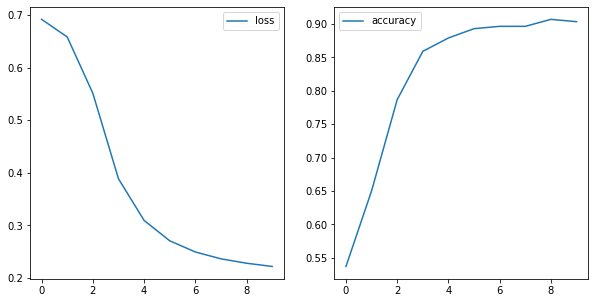

In [183]:
relu_loss = results.history['loss']
relu_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, relu_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, relu_accuracy, ax=ax2, label='accuracy')

Epoch 1/30
1149/1149 [==============================] - 2s 2ms/step - loss: 1.0823 - acc: 0.4830
Epoch 2/30
1149/1149 [==============================] - 0s 63us/step - loss: 0.8540 - acc: 0.5022
Epoch 3/30
1149/1149 [==============================] - 0s 62us/step - loss: 0.8703 - acc: 0.5335
Epoch 4/30
1149/1149 [==============================] - 0s 62us/step - loss: 1.0088 - acc: 0.4926
Epoch 5/30
1149/1149 [==============================] - 0s 72us/step - loss: 0.8866 - acc: 0.4970
Epoch 6/30
1149/1149 [==============================] - 0s 60us/step - loss: 0.9379 - acc: 0.4804
Epoch 7/30
1149/1149 [==============================] - 0s 61us/step - loss: 0.8235 - acc: 0.5048
Epoch 8/30
1149/1149 [==============================] - 0s 70us/step - loss: 0.7988 - acc: 0.5222
Epoch 9/30
1149/1149 [==============================] - 0s 62us/step - loss: 0.9850 - acc: 0.4648
Epoch 10/30
1149/1149 [==============================] - 0s 85us/step - loss: 0.8171 - acc: 0.5065
Epoch 11/30
1149/114

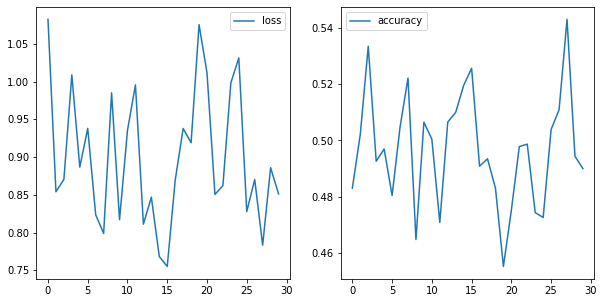

In [193]:
from keras.optimizers import SGD

model = Sequential()

sgd = SGD(lr=9)
model.add(Dense(12, activation='sigmoid', input_dim=64,))
model.add(Dense(8 ,  activation='sigmoid' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer=sgd ,
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])

# Assign the variable history to store the results, and set verbose=1 so we can see the output.
results = model.fit(X_t, y_t, epochs=30, batch_size=32, verbose=1)

relu_loss = results.history['loss']
relu_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, relu_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, relu_accuracy, ax=ax2, label='accuracy')

Let's get a bit more modern, and apply a relu activation function in our layers.

In [117]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# We can tinker with verbose to show the output
results = model.fit(X_t, y_t, epochs=50, batch_size= 32, verbose=0)

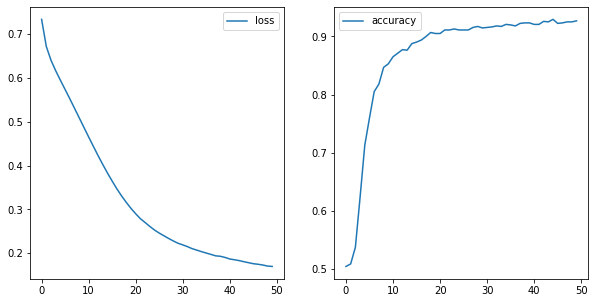

In [118]:
relu_loss = results.history['loss']
relu_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, relu_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, relu_accuracy, ax=ax2, label='accuracy')

In [119]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# We can tinker with verbose to show the output
results = model.fit(X_t, y_t, epochs=10, batch_size= 1, verbose=1)

Epoch 1/10
1149/1149 [==============================] - 3s 2ms/step - loss: 0.5115 - acc: 0.7424
Epoch 2/10
1149/1149 [==============================] - 1s 1ms/step - loss: 0.2565 - acc: 0.8938
Epoch 3/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.2175 - acc: 0.9156
Epoch 4/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.1797 - acc: 0.9252
Epoch 5/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.1553 - acc: 0.9373
Epoch 6/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.1380 - acc: 0.9426
Epoch 7/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.1094 - acc: 0.9521
Epoch 8/10
1149/1149 [==============================] - 2s 2ms/step - loss: 0.0938 - acc: 0.9661
Epoch 9/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.0828 - acc: 0.9704
Epoch 10/10
1149/1149 [==============================] - 2s 2ms/step - loss: 0.0710 - acc: 0.9730


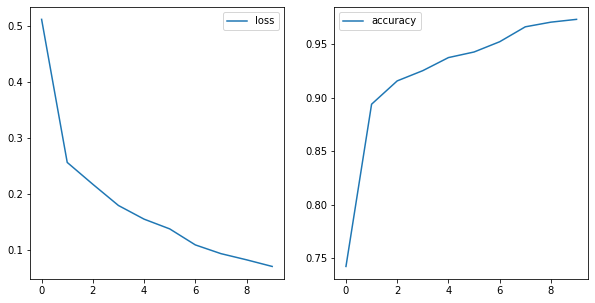

In [120]:
relu_loss = results.history['loss']
relu_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, relu_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, relu_accuracy, ax=ax2, label='accuracy')

We are reaching a high accuracy, but still looks like our model has not converged. If we increased our number of epochs, we would be looking at a long wait.

We have been implementing the vanilla version of gradient descent.  Remember, SGD updates the parameters uniformly across the board.  Let's try out an optimizer used more often these days.

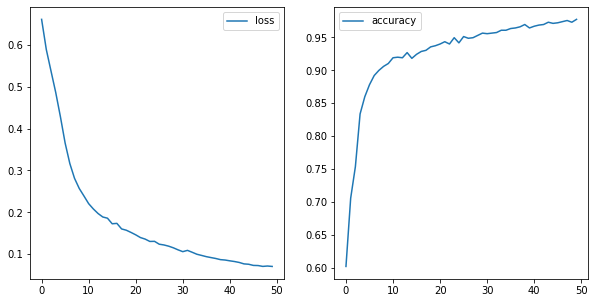

In [121]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# We can tinker with verbose to show the output
results = model.fit(X_t, y_t, epochs=50, batch_size= 32, verbose=0)

relu_loss = results.history['loss']
relu_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, relu_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, relu_accuracy, ax=ax2, label='accuracy')

Now our accuracy is really improving, and it looks like our learning may be leveling out.

Since Adam and relu are relatively faster than SGD and sigmoid, we can add more epochs, and more layers without the training time getting unwieldy.

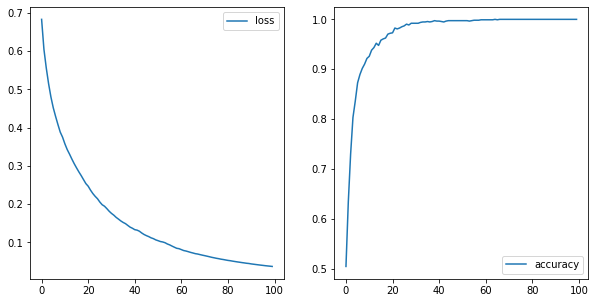

In [122]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0)

adam_loss = results.history['loss']
adam_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, adam_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, adam_accuracy, ax=ax2, label='accuracy')

No it looks like we're getting somewhere.

For comparison, look at how much more quickly Adam learns than SGD.

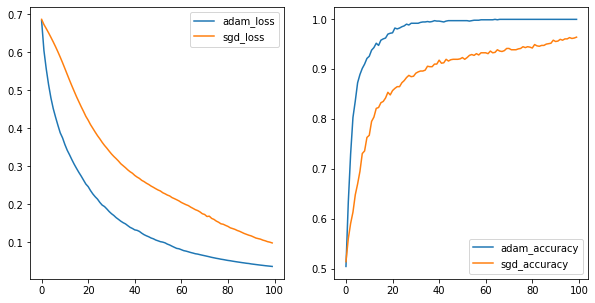

In [123]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0)

sgd_loss = results.history['loss']
sgd_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, adam_loss, ax=ax1, label='adam_loss')
sns.lineplot(results.epoch, adam_accuracy, ax=ax2, label='adam_accuracy')

sns.lineplot(results.epoch, sgd_loss, ax=ax1, label='sgd_loss')
sns.lineplot(results.epoch, sgd_accuracy, ax=ax2, label='sgd_accuracy')

We have been looking only at our training set. Let's add in our validation set to the picture.

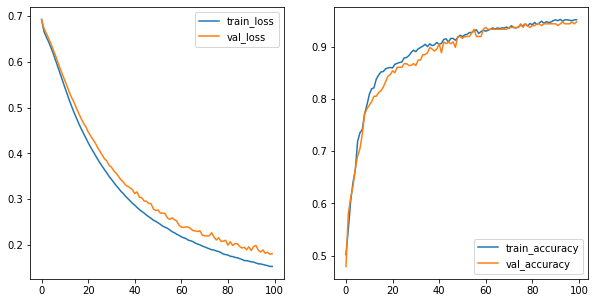

In [124]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

Consider that we still see our loss decreasing and our accuracy increasing.  We try to add more complexity to our model by adding more layers.

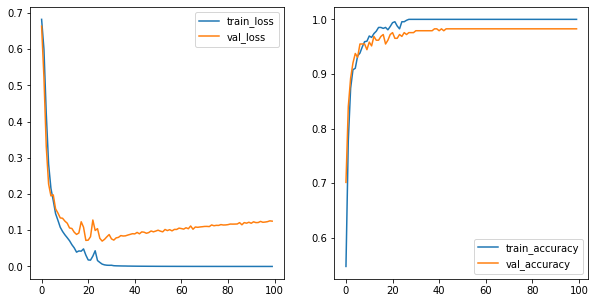

In [194]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu' ))

model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

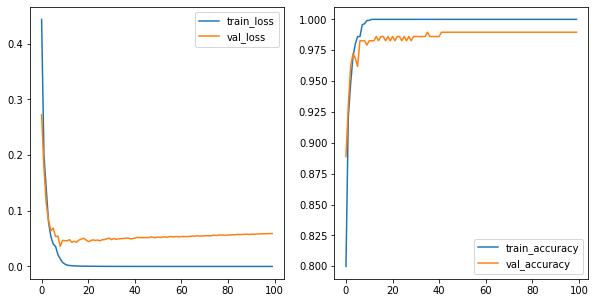

In [195]:
np.random.seed(42)

model = Sequential()
model.add(Dense(300, activation='relu', input_dim=64,))
model.add(Dense(200 ,  activation='relu' ))

model.add(Dense(80 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

We see that our model is overfit.  Just like in our previous models, after a certain amount of learning, the loss on the validation set starts increasing.

# Regularization


Does regularization make sense in the context of neural networks? <br/>

Yes! We still have all of the salient ingredients: a loss function, overfitting vs. underfitting, and coefficients (weights) that could get too large.

But there are now a few different flavors besides L1 and L2 regularization. (Note that L1 regularization is not common in the context of  neural networks.)

In [200]:
from keras import regularizers

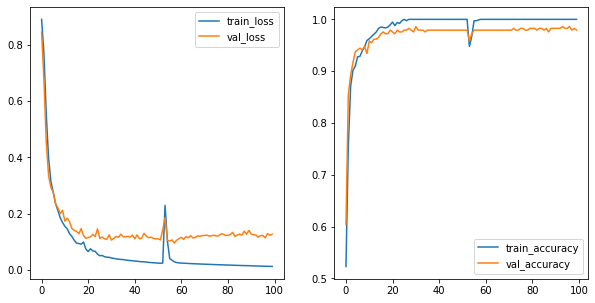

In [201]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(12 ,  activation='relu'))
model.add(Dense(12 ,  activation='relu',  ))
model.add(Dense(12 ,  activation='relu', ))
model.add(Dense(8 ,  activation='relu' ,))
model.add(Dense(4 ,  activation='relu'))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

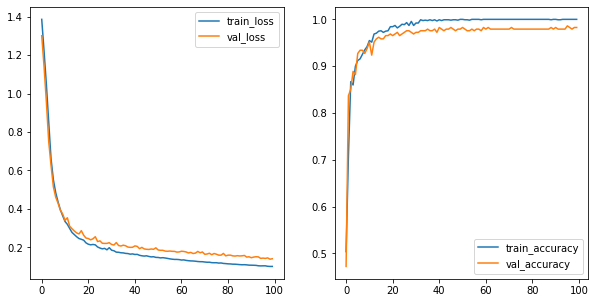

In [202]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(12 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(12 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01) ))
model.add(Dense(12 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(8 ,  activation='relu' , kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(4 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01) ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

In [203]:
from keras.layers import Dropout

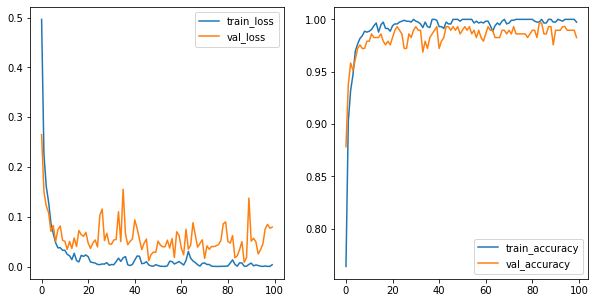

In [204]:
np.random.seed(42)

model = Sequential()
model.add(Dense(300, activation='relu', input_dim=64,))
model.add(Dropout(.3))
model.add(Dense(200 ,  activation='relu' ))
model.add(Dropout(.2))
model.add(Dense(80 ,  activation='relu' ))
model.add(Dropout(.01))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

# Early Stopping

In [205]:
from keras.callbacks import EarlyStopping


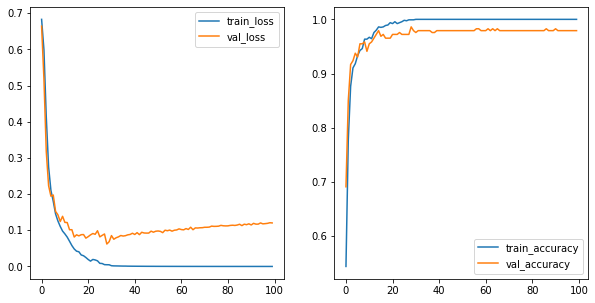

In [206]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu' ))

model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

Epoch 00006: early stopping


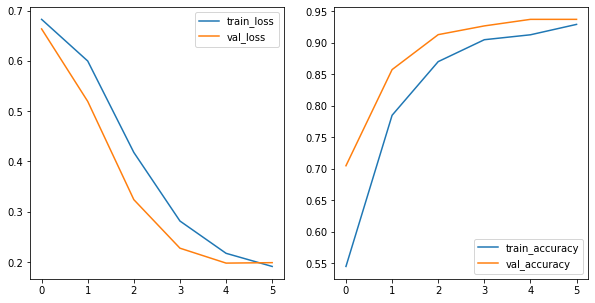

In [207]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu' ))

model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=0, verbose=1,
                           mode='min')
results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val),
                   callbacks=[early_stop])



train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

Epoch 00044: early stopping


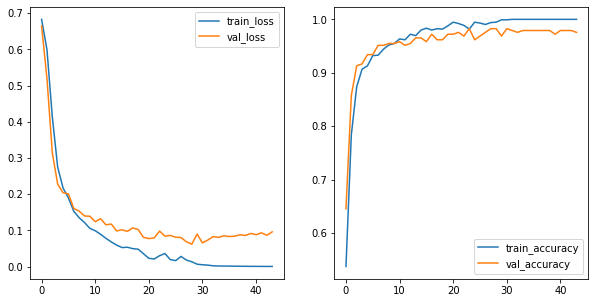

In [135]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu' ))

model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=15, verbose=1,
                           mode='min')
results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val),
                   callbacks=[early_stop])



train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

Now let's return to the original problem: predicting 0 through 9

In [136]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X = digits.data
y = digits.target

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state=42, test_size=.2)
X_t, X_val, X_test = X_t/16, X_val/16, X_test/16


In [138]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
y_t = ohe.fit_transform(y_t.reshape(-1,1))
y_val = ohe.transform(y_val.reshape(-1,1))
y_test = ohe.transform(y_test.reshape(-1,1))

In [139]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(10 , activation = 'softmax' ))

model.compile(optimizer='adam',
              loss='categorical_crossentropy'  ,
              metrics=['accuracy'])
results = model.fit(X_t, y_t, epochs=50, batch_size= 10, validation_data=(X_val, y_val))

Train on 1149 samples, validate on 288 samples
Epoch 1/50
1149/1149 [==============================] - 2s 2ms/step - loss: 2.2504 - acc: 0.2019 - val_loss: 2.1269 - val_acc: 0.3021
Epoch 2/50
1149/1149 [==============================] - 0s 226us/step - loss: 2.0117 - acc: 0.3029 - val_loss: 1.8210 - val_acc: 0.3403
Epoch 3/50
1149/1149 [==============================] - 0s 230us/step - loss: 1.6898 - acc: 0.4439 - val_loss: 1.4530 - val_acc: 0.5556
Epoch 4/50
1149/1149 [==============================] - 0s 246us/step - loss: 1.2976 - acc: 0.6240 - val_loss: 1.0906 - val_acc: 0.6806
Epoch 5/50
1149/1149 [==============================] - 0s 230us/step - loss: 0.9716 - acc: 0.7076 - val_loss: 0.8386 - val_acc: 0.7188
Epoch 6/50
1149/1149 [==============================] - 0s 228us/step - loss: 0.7691 - acc: 0.7615 - val_loss: 0.6954 - val_acc: 0.7917
Epoch 7/50
1149/1149 [==============================] - 0s 225us/step - loss: 0.6380 - acc: 0.8207 - val_loss: 0.5773 - val_acc: 0.8125
Epo

In [140]:
history = results.history
training_loss = history['loss']
val_loss = history['val_loss']
training_accuracy = history['acc']
val_accuracy = history['val_acc']


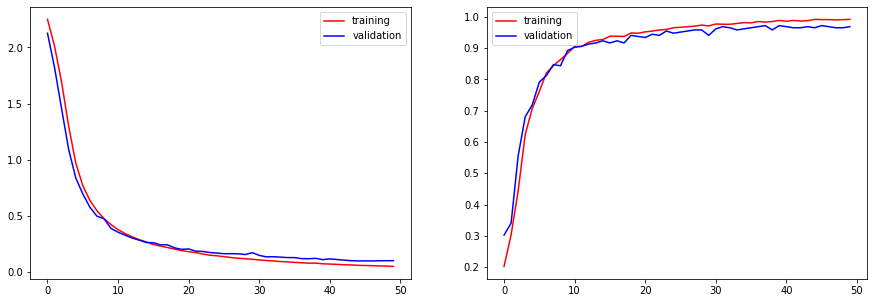

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))


sns.lineplot(list(range(len(training_loss))), training_loss, c='r', label='training', ax=ax1)
sns.lineplot(list(range(len(val_loss))), val_loss, c='b', label='validation', ax=ax1)
sns.lineplot(list(range(len(training_loss))), training_accuracy, c='r', label='training',ax=ax2)
sns.lineplot(list(range(len(val_loss))), val_accuracy, c='b', label='validation',ax=ax2)
ax1.legend()

In [142]:
y_hat_test = model.predict_classes(X_test)

In [143]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_test = ohe.inverse_transform(y_test)
confusion_matrix(y_test, y_hat_test)

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 32,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  1,  0,  0,  1,  0,  0, 26,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  1, 37]])

Keras comes with all sorts of handy tools, including ways to streamline train test split from folders on your desktop. You will definitely find this useful. Learn will lead the way.

You don't have this dog vs. cat dataset on your computer, but that is ok. 

The code below shows how we process that data with Keras. It also shows that a basic neural net does not perform well on the dataset.  Tomorrow, we will explore better tools for image processing.

In [153]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


train_data_dir = 'dogvcat/dataset/training_set'
test_data_dir = 'dogvcat/dataset/test_set'

# Get all the data in the directory data/validation (132 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), batch_size=1000)

# Get all the data in the directory data/train (790 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=5000)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 2001 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [154]:
len(train_images)

5000

In [155]:
train_images[0].shape

(64, 64, 3)

In [156]:
train_images[0].flatten()

array([0.12156864, 0.01568628, 0.03529412, ..., 0.40000004, 0.36078432,
       0.3529412 ], dtype=float32)

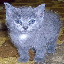

In [157]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
array_to_img(train_images[0])



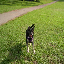

In [158]:
array_to_img(train_images[-1])

In [150]:
tr_images = train_images.reshape(train_images.shape[0], -1)
te_images = test_images.reshape(test_images.shape[0], -1)
tr_images.shape

(5000, 12288)

In [152]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=12288,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(3 ,  activation='relu' ))
model.add(Dense(2 , activation = 'sigmoid' ))

model.compile(optimizer='adam' ,
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])
results = model.fit(tr_images, train_labels, epochs=20, batch_size= 10,
                    validation_data=(te_images, test_labels))

Train on 5000 samples, validate on 1000 samples
Epoch 1/20
5000/5000 [==============================] - 4s 751us/step - loss: 0.6954 - acc: 0.4938 - val_loss: 0.6932 - val_acc: 0.4890
Epoch 2/20
5000/5000 [==============================] - 2s 356us/step - loss: 0.6932 - acc: 0.4998 - val_loss: 0.6933 - val_acc: 0.4890
Epoch 3/20
5000/5000 [==============================] - 2s 348us/step - loss: 0.6932 - acc: 0.4974 - val_loss: 0.6932 - val_acc: 0.4890
Epoch 4/20
5000/5000 [==============================] - 2s 347us/step - loss: 0.6932 - acc: 0.4944 - val_loss: 0.6932 - val_acc: 0.4890
Epoch 5/20
5000/5000 [==============================] - 2s 341us/step - loss: 0.6932 - acc: 0.4954 - val_loss: 0.6933 - val_acc: 0.4890
Epoch 6/20
5000/5000 [==============================] - 2s 348us/step - loss: 0.6932 - acc: 0.5010 - val_loss: 0.6932 - val_acc: 0.4890
Epoch 7/20
5000/5000 [==============================] - 2s 354us/step - loss: 0.6932 - acc: 0.4950 - val_loss: 0.6931 - val_acc: 0.5110
